# Excercise 2 . A

- What kind of machine learning problem is this?
- A: Classification
The kind of machine learning problem we are facing when working with the titanic dataset is a classification problem. We are trying to predict whether a passenger survived or not, which is a binary classification problem.
Other problems that arise when working with the titanic dataset is regression problems, where we are trying to predict a continuous value, such as the fare of a ticket, or the age of a passenger.
We could also use anomaly detection to check whether something in the titanic dataset is out of the ordinary, examples of this could be the fare of a ticket, or the age of a passenger, that is way above the average.

- How many different features (not counting labels (y-values) as a feature here) are there in this dataset?
- A: 11
There are 10 different features in the titanic dataset, these are shown in the markdown below.
- How many of these features would the Y-data (the labels) consist of?
- A: 1
The Y-data consists of 1 feature, which is whether the passenger survived or not.


Given the expanded Titanic dataset that holds these values:
- PassengerId: A unique id for each passenger
- Survival: Survived or not 1 = survived, 0 = died
- pclass: Passenger class 1 = 1st class, 2 = second class, 3 = third class
- Sex: Sex Male or female
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch # of parents / children aboard the Titanic
- Ticket: A ticket number
- fare: The price paid for the ticket
- cabin: The cabin numer
- embarked: Port city where the passenger embarked i.e. C = Cherbourg, Q = Queenstown, S = Southampton

# Excercise 2 . B
- What features do we want to keep?
I'd Like to keep all of the values except for the ticket number, as this is a unique value for each passenger, and would not be useful for our model. Also the passenger id is not useful for our model, as this is also a unique value for each passenger.
I've  also decided to get rid of Name and Cabin, as these are also unique values for each passenger, and would not be useful for our model. However, name could be relevant when trying to predict since we could have some where 'Sir' in this dataset is present, given that these could by royalty, and therefore have a higher chance of survival. However, I've decided to drop this feature, as it is only 2 people in the dataset that has the "Sir" title.

The reason I've also decided to keep embarked is because I think that the port city where the passenger embarked could have an impact on whether the passenger survived or not. Given this article: https://www.shiftcomm.com/insights/never-let-go-titanic-survival-101/
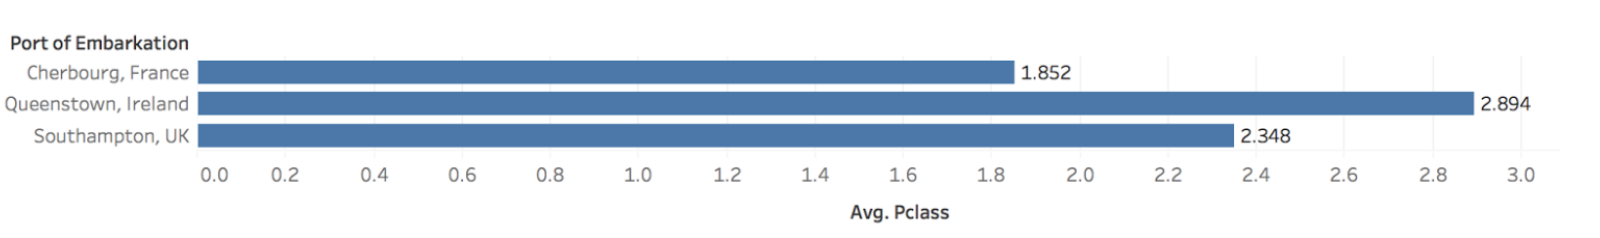
As the image suggests


In [549]:
#Imports

In [550]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [551]:
#Load data

In [552]:
data = pd.read_csv('titanic_800.csv',sep=',',header=0)
# Displaying a summary of the data
print(data.describe(include='all'))

        PassengerId  Survived      Pclass                     Name   Sex  \
count      800.0000  800.0000  800.000000                      800   800   
unique          NaN       NaN         NaN                      800     2   
top             NaN       NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN       NaN         NaN                        1   517   
mean       400.5000    0.3850    2.305000                      NaN   NaN   
std        231.0844    0.4869    0.836869                      NaN   NaN   
min          1.0000    0.0000    1.000000                      NaN   NaN   
25%        200.7500    0.0000    2.000000                      NaN   NaN   
50%        400.5000    0.0000    3.000000                      NaN   NaN   
75%        600.2500    1.0000    3.000000                      NaN   NaN   
max        800.0000    1.0000    3.000000                      NaN   NaN   

               Age       SibSp       Parch   Ticket           Fare Cabin  \
count   637

In [553]:
# As we can see from the data.describe the values hold some NaN values, we will have to clean these up.
# The data also shows that we will have to convert some of the values to numerical values, as they are currently strings. feature scale the data, and split the data into training and test data.

# Preparing the data

In [554]:
# Dropping the ticket and passenger id columns

In [555]:
data = data.drop(['Ticket','PassengerId','Cabin', 'Name'],axis=1)

In [556]:
# Replacing the NaN values in the age column with the mean age

In [557]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [558]:
# Replacing the NaN values in the embarked column with the most common value

In [559]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Splitting data
Q: How many would you put into the training set and how many would you put into the test set? Give
reasons for your decision?
A: The data is split into training and test data, with 80% of the data being used for training, and 20% of the data being used for testing.

In [560]:
# Splitting the data into training and test data

In [561]:
x = data.drop(['Survived'],axis=1)

y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Some x values are strings, and we will have to convert these to numerical values, so that we can use them in our model.

In [562]:
# Converting the string values to numerical values

x_train["Sex"] = x_train["Sex"].replace(['female'], 1.0)
x_train["Sex"] = x_train["Sex"].replace(['male'], 0.0)
x_train["Embarked"] = x_train["Embarked"].replace(['C'], 1.0)
x_train["Embarked"] = x_train["Embarked"].replace(['Q'], 2.0)
x_train["Embarked"] = x_train["Embarked"].replace(['S'],3.0)

#Goes for tests aswell
x_test["Sex"] = x_test["Sex"].replace(['female'], 1.0)
x_test["Sex"] = x_test["Sex"].replace(['male'], 0.0)
x_test["Embarked"] = x_test["Embarked"].replace(['C'], 1.0)
x_test["Embarked"] = x_test["Embarked"].replace(['Q'], 2.0)
x_test["Embarked"] = x_test["Embarked"].replace(['S'],3.0)

In [563]:
#Displaying the data in matplotlib

Normalizing the data

In [564]:
# Normalizing the data

In [565]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Now that the data is cleaned up, and split into training and test data, we can start training our model.

# Excercise 2 . C - D - E
- Choosing a model and doing training.
I've chosen to use a Multi-layer Perceptron Classifier, as this is a classification problem, and the MLPClassifier is a classifier.
I'm also going to be testing with different hidden layer sizes, to see which one gives the best results.

Another model I'm going to test is the random forest classifier, as this is also a classification problem, and the random forest classifier is also a classifier.

In [566]:
# Training the model

In [567]:
mlp = MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=5000)
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=5000)

In [568]:
# Predicting the test data

In [569]:
predictions = mlp.predict(x_test)

In [570]:
# Evaluating the model performance

In [571]:
print("Confusion matrix: \n",confusion_matrix(y_test,predictions))

Confusion matrix: 
 [[84 17]
 [15 44]]


In [572]:
print("Classification report: \n",classification_report(y_test,predictions))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       101
           1       0.72      0.75      0.73        59

    accuracy                           0.80       160
   macro avg       0.78      0.79      0.79       160
weighted avg       0.80      0.80      0.80       160


In [573]:
print("Accuracy: ",mlp.score(x_test, y_test))

Accuracy:  0.8


In [574]:
# Plotting the confusion matrix

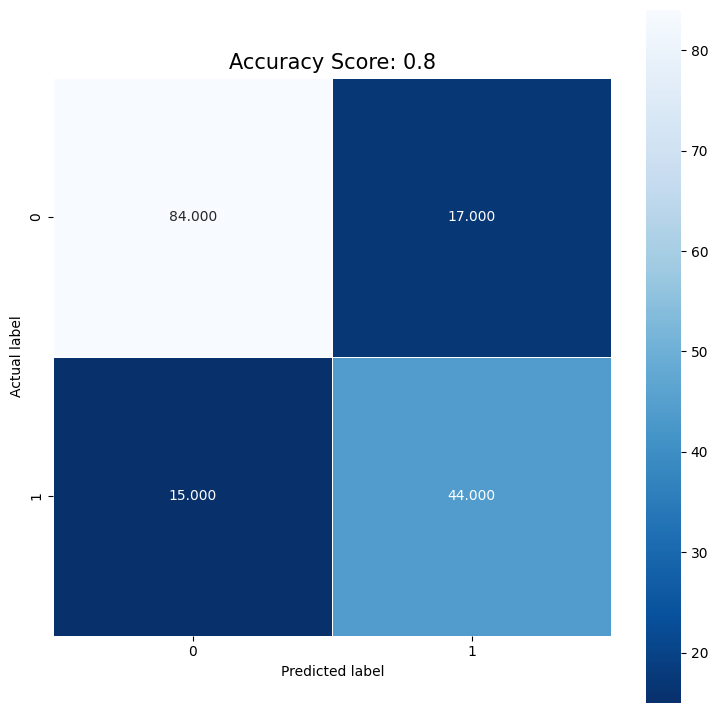

In [575]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(mlp.score(x_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

# Random forest classifier
- We will be making the same steps as we did with the MLPClassifier, but with the random forest classifier.
- We will also be testing with different n_estimators, to see which one gives the best results.
- We will also be testing with different max_depth, to see which one gives the best results.

In [576]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
forest.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, random_state=0)

In [577]:
# Predicting the test data

In [578]:
predictions = forest.predict(x_test)

In [579]:
print("Confusion matrix: \n",confusion_matrix(y_test,predictions))

Confusion matrix: 
 [[93  8]
 [19 40]]


In [580]:
print("Classification report: \n",classification_report(y_test,predictions))

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       101
           1       0.83      0.68      0.75        59

    accuracy                           0.83       160
   macro avg       0.83      0.80      0.81       160
weighted avg       0.83      0.83      0.83       160


In [581]:
print("Accuracy: ",forest.score(x_test, y_test))

Accuracy:  0.83125


In [582]:
# Plotting the confusion matrix

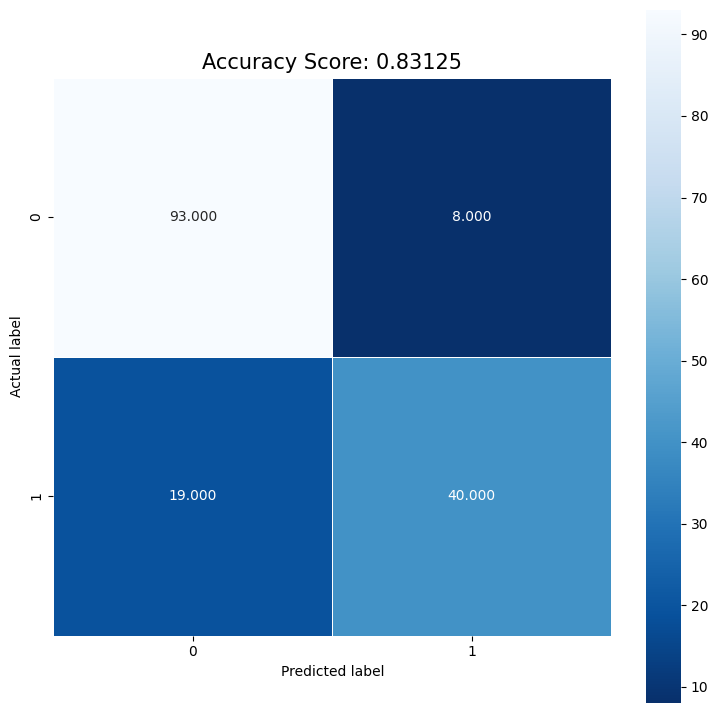

In [583]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(forest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)
plt.show()

 # Conclusion
 I've tried some settings on both the neural net and the randomforest classifier, it seems that they both equally perform well, with the random forest classifier having a slightly better accuracy score, but that might be due to the max_depth is set to 5.
 To answer the question
 What is your model best at?
    A: The neural net was good at both TP and TN, however the random forest classifier was better at TP, but worse at TN. The neural net did however have a worse FN, and since we are trying to predict survival, it isn't good if we predict that someone is dead when really they are alive. My choice would be with the neural net.